In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import random                        
from sklearn.preprocessing import LabelEncoder

from keras.models import Sequential  # Model Нейронной сети

from keras.layers.core import Dense, Dropout, Activation # Функции Активации и Слои нейронной сети
from keras.utils import np_utils  

In [ ]:
#загрузка данных
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
training_images_filepath = '/content/drive/MyDrive/Colab Notebooks/innopolis/kaggle emnist/emnist-letters-train-images-idx3-ubyte'
training_labels_filepath = '/content/drive/MyDrive/Colab Notebooks/innopolis/kaggle emnist/emnist-letters-train-labels-idx1-ubyte'
test_images_filepath = '/content/drive/MyDrive/Colab Notebooks/innopolis/kaggle emnist/emnist-letters-test-images-idx3-ubyte'
test_labels_filepath = '/content/drive/MyDrive/Colab Notebooks/innopolis/kaggle emnist/emnist-letters-test-labels-idx1-ubyte'
final_test_filepath='/content/drive/MyDrive/Colab Notebooks/innopolis/kaggle emnist/emnist-letters-test-sh.csv'
final_test_labels='/content/drive/MyDrive/Colab Notebooks/innopolis/kaggle emnist/kaggle_true_solution.csv'

In [ ]:
X_train, y_train = loadlocal_mnist(training_images_filepath, training_labels_filepath)
X_test, y_test = loadlocal_mnist(test_images_filepath, test_labels_filepath)
X_final= np.array(pd.read_csv(final_test_filepath,header=None))
y_final=np.array(pd.read_csv(final_test_labels))[:,1]

In [ ]:
#оценка количества объектов
print('Dimension of training images:', np.shape(X_train))
print('Dimension of trainig labels:',np.shape(y_train))
print('Dimension of testing images:', np.shape(X_test))
print('Dimension of testing labels:',np.shape(y_test))
print('Dimension of final testing images:',np.shape(X_final))
print('Dimension of final testing labels:',np.shape(y_final))

Dimension of training images: (124800, 784)
Dimension of trainig labels: (124800,)
Dimension of testing images: (20800, 784)
Dimension of testing labels: (20800,)
Dimension of final testing images: (14800, 784)
Dimension of final testing labels: (14800,)


In [ ]:
letters=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q','r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'] 

In [ ]:
X_train.dtype

dtype('uint8')

In [ ]:
X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')
X_final = X_final.astype('float32')

X_train /= 255                       
X_test /= 255
X_final /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (124800, 784)
Testing matrix shape (20800, 784)


In [ ]:
nb_classes = len(np.unique(y_train))
LE=LabelEncoder()
LE.fit(y_train)

Y_train = np_utils.to_categorical(LE.transform(y_train), nb_classes)
Y_test = np_utils.to_categorical(LE.transform(y_test), nb_classes)
Y_final = np_utils.to_categorical(LE.transform(y_final), nb_classes)

In [ ]:
Y_train[1]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
LE.classes_

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=uint8)

In [ ]:
y_train[:5]

array([23,  7, 16, 15, 23], dtype=uint8)

In [ ]:
Y_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
model = Sequential()

## The first hidden layer

In [ ]:
model.add(Dense(512, input_shape=(784,))) 

In [ ]:
model.add(Activation('relu'))

In [ ]:
# Dropout - это аналог регуляризации в нейронных сетях
model.add(Dropout(0.2))

## Adding the second hidden layer

In [ ]:
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

## The Final Output Layer

In [ ]:
# Последний уровень FCN должен быть равен количеству желаемых классов (в данном случае 10).
model.add(Dense(nb_classes))

In [ ]:
model.add(Activation('softmax'))

In [ ]:
# Вывод получившейся нейронной сети:

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation_15 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_16 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 26)               

## Сборка модели

Keras построен на основе Theano и TensorFlow. Оба пакета позволяют вам определять граф вычислений в Python, который затем компилируется и эффективно запускается на CPU или GPU без дополнительных затрат на интерпретатор Python.

При составлении модели Keras просит вас указать вашу функцию потерь и ваш оптимизатор. Функция потерь, которую мы здесь будем использовать, называется категориальной кросс-энтропией и является функцией потерь, хорошо подходящей для сравнения двух распределений вероятностей.

Оптимизатор помогает определить, насколько быстро модель обучается с помощью градиентного спуска. Скорость, с которой сходится градиент, называется скоростью обучения.

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Обучение нейронной сети!


batch_size определяет, сколько данных на шаг используется для вычисления функции потерь, градиентов и обратного распространения. Большие размеры пакетов позволяют сети быстрее завершить обучение; Однако следует учитывать и другие факторы, помимо скорости тренировки.

Слишком большой размер batch_sizeкета сглаживает локальные минимумы функции потерь, d hезультате чего оптимизатор застревает в Локальном минимуме.

Слишком маленький размер batch_sizeкета создает очень "зашумленную" функцию потерь, и оптимизатор может никогда не найти глобальный минимум.


In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
3900/3900 [==============================] - 15s 4ms/step - loss: 0.6197 - accuracy: 0.8076
Epoch 2/10
3900/3900 [==============================] - 15s 4ms/step - loss: 0.3853 - accuracy: 0.8756
Epoch 3/10
3900/3900 [==============================] - 14s 4ms/step - loss: 0.3346 - accuracy: 0.8901
Epoch 4/10
3900/3900 [==============================] - 14s 4ms/step - loss: 0.3078 - accuracy: 0.8983
Epoch 5/10
3900/3900 [==============================] - 14s 4ms/step - loss: 0.2900 - accuracy: 0.9026
Epoch 6/10
3900/3900 [==============================] - 14s 4ms/step - loss: 0.2764 - accuracy: 0.9080
Epoch 7/10
3900/3900 [==============================] - 14s 4ms/step - loss: 0.2654 - accuracy: 0.9116
Epoch 8/10
3900/3900 [==============================] - 14s 4ms/step - loss: 0.2576 - accuracy: 0.9142
Epoch 9/10
3900/3900 [==============================] - 14s 4ms/step - loss: 0.2500 - accuracy: 0.9160
Epoch 10/10
3900/3900 [==============================] - 14s 4ms/step - l

## Проверим точность модели

In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

650/650 [==============================] - 2s 3ms/step - loss: 0.2924 - accuracy: 0.9122
Test score: 0.2924160659313202
Test accuracy: 0.912211537361145


In [ ]:
model.evaluate(X_final, Y_final)

463/463 [==============================] - 2s 4ms/step - loss: 0.3237 - accuracy: 0.8984


[0.3237367272377014, 0.8984459638595581]

In [ ]:
predicted_classes = np.argmax(model.predict(X_final),axis=1)

correct_indices = np.nonzero(predicted_classes == y_final)[0]

incorrect_indices = np.nonzero(predicted_classes != y_final)[0]

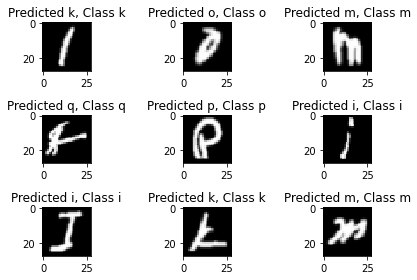

In [ ]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_final[correct].reshape(28,28).T, cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(letters[predicted_classes[correct]-1], letters[y_final[correct]-1]))
    
plt.tight_layout()  


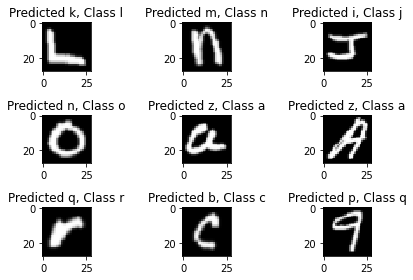

In [ ]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_final[incorrect].reshape(28,28).T, cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(letters[predicted_classes[incorrect]-1], letters[y_final[incorrect]-1]))
    
plt.tight_layout()

# Сверточные Нейронные Сети

##  "Deep" Convolutional Neural Network

In [ ]:
# import 
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from keras.layers.normalization.batch_normalization import BatchNormalization

In [ ]:
X_train, y_train = loadlocal_mnist(training_images_filepath, training_labels_filepath)
X_test, y_test = loadlocal_mnist(test_images_filepath, test_labels_filepath)
X_final= np.array(pd.read_csv(final_test_filepath,header=None))
y_final=np.array(pd.read_csv(final_test_labels))[:,1]

X_train = X_train.reshape(124800, 28, 28, 1) 
X_test = X_test.reshape(20800, 28, 28, 1)
X_final = X_final.reshape(14800, 28, 28, 1)

X_train = X_train.astype('float32')         
X_test = X_test.astype('float32')
X_final = X_final.astype('float32')

X_train /= 255                              
X_test /= 255
X_final /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (124800, 28, 28, 1)
Testing matrix shape (20800, 28, 28, 1)


In [ ]:
nb_classes = len(np.unique(y_train))
LE=LabelEncoder()
LE.fit(y_train)

Y_train = np_utils.to_categorical(LE.transform(y_train), nb_classes)
Y_test = np_utils.to_categorical(LE.transform(y_test), nb_classes)
Y_final = np_utils.to_categorical(LE.transform(y_final), nb_classes)

In [ ]:
model = Sequential()                                 

# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 РАЗНЫХ! 3x3 kernels -- это 32 карты с признаками
model.add(BatchNormalization(axis=-1))                
convLayer01 = Activation('relu')                    
model.add(convLayer01)

# Convolution Layer 2
model.add(Conv2D(32, (3, 3)))                        
model.add(BatchNormalization(axis=-1))               
model.add(Activation('relu'))                        
convLayer02 = MaxPooling2D(pool_size=(2,2))          # MaxPool операция 2x2 kernel
model.add(convLayer02)

# Convolution Layer 3
model.add(Conv2D(64,(3, 3)))                         # 64 РАЗНЫХ! 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))              
convLayer03 = Activation('relu')                     
model.add(convLayer03)

# Convolution Layer 4
model.add(Conv2D(64, (3, 3)))                        
model.add(BatchNormalization(axis=-1))               
model.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # MaxPool операция 2x2 kernel
model.add(convLayer04)
model.add(Flatten())                                 # Разворачиваем матрицу 4x4x64 в 1024-мерный плоский вектор

# Fully Connected Layer 5
model.add(Dense(512))                                # 512 нейронов
model.add(BatchNormalization())               
model.add(Activation('relu'))                      

# Fully Connected Layer 6                       
model.add(Dropout(0.2))                              # 20% dropout 
model.add(Dense(nb_classes))                                 # выходной слой 10 нейронов
model.add(Activation('softmax'))                     # softmax  (перевзвешивает все предсказания для получения значения в диапазоне 0..1)

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_5 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_24 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_25 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)       

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train,
          batch_size=32, epochs=10,
          verbose=1)

Epoch 1/10
3900/3900 [==============================] - 76s 12ms/step - loss: 0.3204 - accuracy: 0.8956
Epoch 2/10
3900/3900 [==============================] - 50s 13ms/step - loss: 0.1973 - accuracy: 0.9326
Epoch 3/10
3900/3900 [==============================] - 50s 13ms/step - loss: 0.1702 - accuracy: 0.9405
Epoch 4/10
3900/3900 [==============================] - 50s 13ms/step - loss: 0.1500 - accuracy: 0.9465
Epoch 5/10
3900/3900 [==============================] - 50s 13ms/step - loss: 0.1360 - accuracy: 0.9501
Epoch 6/10
3900/3900 [==============================] - 50s 13ms/step - loss: 0.1250 - accuracy: 0.9534
Epoch 7/10
3900/3900 [==============================] - 50s 13ms/step - loss: 0.1157 - accuracy: 0.9564
Epoch 8/10
3900/3900 [==============================] - 50s 13ms/step - loss: 0.1066 - accuracy: 0.9591
Epoch 9/10
3900/3900 [==============================] - 50s 13ms/step - loss: 0.0984 - accuracy: 0.9618
Epoch 10/10
3900/3900 [==============================] - 50s 13m

In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

650/650 [==============================] - 3s 5ms/step - loss: 0.1719 - accuracy: 0.9477
Test score: 0.1719062328338623
Test accuracy: 0.947740375995636


In [ ]:
model.evaluate(X_final, Y_final)

463/463 [==============================] - 3s 6ms/step - loss: 0.1935 - accuracy: 0.9376


[0.19348594546318054, 0.9375675916671753]

In [ ]:
from keras import backend as K


img = X_test[3]
img = np.expand_dims(img, axis=0) 


def visualize(layer):
    inputs = [K.learning_phase()] + model.inputs
    
    _convout1_f = K.function(inputs, [layer.output])
    
    def convout1_f(X):
        return _convout1_f([0] + [X])

    convolutions = convout1_f(img)
    convolutions = np.squeeze(convolutions)

    print ('Shape of conv:', convolutions.shape)
    
    m = convolutions.shape[2]
    n = int(np.ceil(np.sqrt(m)))
    
    fig = plt.figure(figsize=(15,12))
    for i in range(m):
        ax = fig.add_subplot(n,n,i+1)
        ax.imshow(convolutions[:,:,i], cmap='gray')


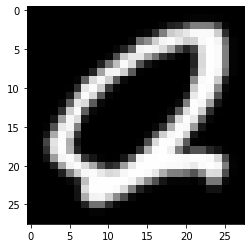

In [ ]:
plt.figure()
plt.imshow(X_test[3].reshape(28,28), cmap='gray', interpolation='none')

In [ ]:
visualize(convLayer01) 

ValueError: ignored

In [ ]:
visualize(convLayer02) 

In [ ]:
visualize(convLayer03)

In [ ]:
visualize(convLayer04)